In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import string
import random

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from nltk.collocations import *
#from nltk import FreqDist, word_tokenize

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing

from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Activation, LSTM, GRU, Dense, GlobalMaxPool1D, Embedding, Dropout, Conv1D, Flatten
from keras.models import Sequential, Model
from keras import backend

Using TensorFlow backend.


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
drugs = pd.read_csv('data/drug_review_clean.csv.zip')

In [4]:
def hot_tokenization(text, num_words=3000):
    tokenizer = Tokenizer(num_words)
    tokenizer.fit_on_texts(text)
    return tokenizer.texts_to_matrix(text, mode='binary')

def hot_pad_sequences(text, num_words=3000, maxlen=100):    
    tokenizer = Tokenizer(num_words)
    tokenizer.fit_on_texts(list(text))
    list_tokenized_headlines = tokenizer.texts_to_sequences(text)
    return sequence.pad_sequences(list_tokenized_headlines, maxlen) 

def hot_label_encoding(labels):
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    labels_cat = le.transform(labels)
    return to_categorical(labels_cat) 

In [5]:
top_10_conditions = drugs.set_index('condition').loc[drugs.condition.value_counts()[:10].keys()]

In [6]:
def rate(x):
    return 'negative' if x < 4 else 'neutral' if x >= 4 and x < 7 else 'positive'

top_10_conditions['sentiment'] = top_10_conditions.rating.map(rate)

In [23]:
X_t = hot_pad_sequences(top_10_conditions.review, maxlen=300)
y = hot_label_encoding(top_10_conditions.sentiment)

In [24]:
train, test, label_train, label_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

In [26]:
backend.clear_session()

model = Sequential()
model.add(Embedding(3000, 100, input_length=300))
model.add(Conv1D(25, 5, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 25)           12525     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 123       
Total params: 313,688
Trainable params: 313,688
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(train, label_train, epochs=3, batch_size=256, validation_split=0.1)

Train on 71080 samples, validate on 7898 samples
Epoch 1/3
71080/71080 [==============================] - 445s 6ms/step - loss: 0.6224 - acc: 0.7529 - val_loss: 0.5196 - val_acc: 0.7943
Epoch 2/3
71080/71080 [==============================] - 724s 10ms/step - loss: 0.4717 - acc: 0.8137 - val_loss: 0.4709 - val_acc: 0.8162
Epoch 3/3
71080/71080 [==============================] - 597s 8ms/step - loss: 0.3776 - acc: 0.8526 - val_loss: 0.4619 - val_acc: 0.8173


In [11]:
history_dict = history.history

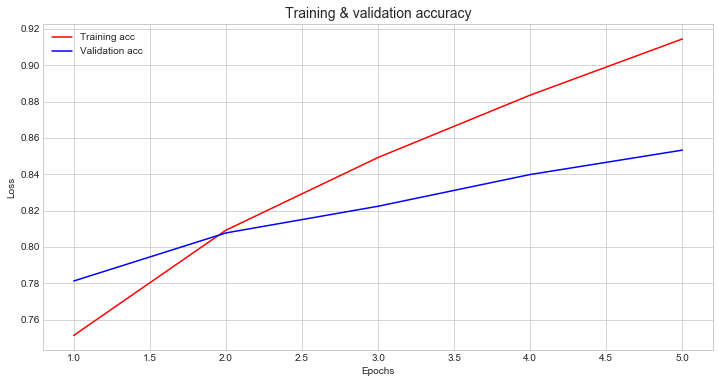

In [12]:
epochs = range(1, len(history_dict['acc']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['acc'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'blue', label='Validation acc')
plt.title('Training & validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

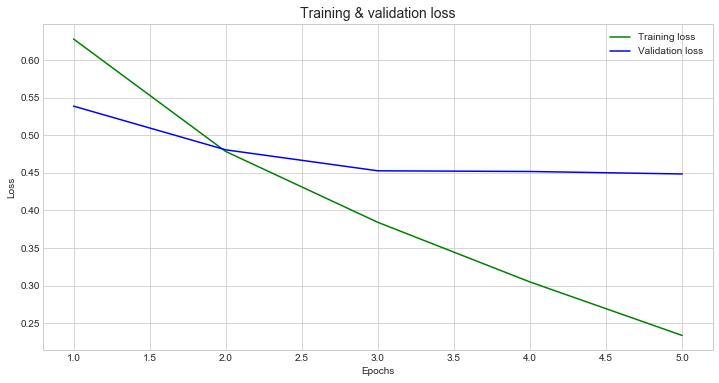

In [13]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history_dict['loss'], 'g', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation loss')

plt.title('Training & validation loss', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
def learning_process(history_dict):
    epochs = range(1, len(history_dict['acc']) + 1)
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(12,6))    
    plt.plot(epochs, history_dict['acc'], 'r', label='Training Accuracy')
    plt.plot(epochs, history_dict['val_acc'], 'orange', label='Validation Accurary')
    plt.title('Training & Validation Accuracy', fontSize=14)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()    
    plt.figure(figsize=(12,6))
    plt.plot(epochs, history_dict['loss'], 'g', label='Training Loss')
    plt.plot(epochs, history_dict['val_loss'], 'blue', label='Validation Loss')        
    plt.title('Training & Validation Loss', fontSize=14)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

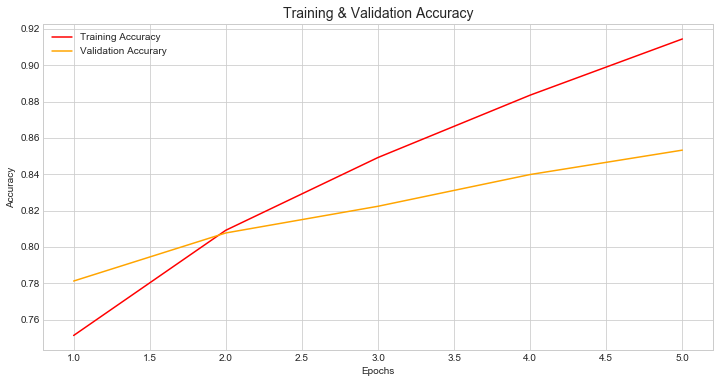

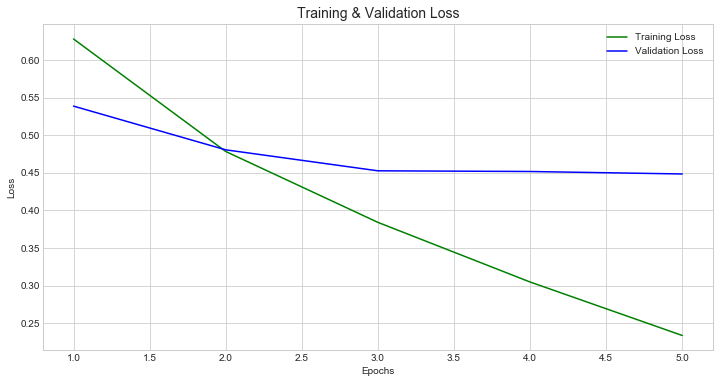

In [25]:
learning_process(history_dict)

In [10]:
history = model.fit(train, label_train, epochs=5, batch_size=256, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 71080 samples, validate on 7898 samples
Epoch 1/5
71080/71080 [==============================] - 232s 3ms/step - loss: 0.6280 - acc: 0.7513 - val_loss: 0.5387 - val_acc: 0.7812
Epoch 2/5
71080/71080 [==============================] - 252s 4ms/step - loss: 0.4784 - acc: 0.8092 - val_loss: 0.4806 - val_acc: 0.8077
Epoch 3/5
71080/71080 [==============================] - 166s 2ms/step - loss: 0.3842 - acc: 0.8492 - val_loss: 0.4527 - val_acc: 0.8224
Epoch 4/5
71080/71080 [==============================] - 176s 2ms/step - loss: 0.3049 - acc: 0.8835 - val_loss: 0.4518 - val_acc: 0.8398
Epoch 5/5
71080/71080 [==============================] - 196s 3ms/step - loss: 0.2338 - acc: 0.9144 - val_loss: 0.4485 - val_acc: 0.8533


In [11]:
history_dict = history.history